In [50]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

from datetime import datetime
from tqdm import tqdm_notebook

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [51]:
import platform
from matplotlib import font_manager, rc

path = 'c:/Windows/Fonts/malgun.ttf'
if platform.system() == 'Darwin' :
    rc('font', family = 'AppleeGothic')
elif platform.system() == 'Windows' :
    font_name = font_manager.FontProperties(fname = path).get_name()
    rc('font', family = font_name)
else:
    print('Unknown system... sorry~~~~')

In [52]:
df = pd.read_excel('../data/유통/종합지표(%).xlsx')
df.head()

,이름,날짜,매출지수,식사,간식,마실거리,홈&리빙,헬스&뷰티,취미&여가활동,사회활동,임신/육아
0,대구광역시 수성구 고산1동,20190201,1.064336,0.450848,0.172221,0.295458,0.023263,0.044679,0.005075,0.004820,0.003637
1,대구광역시 수성구 고산2동,20190201,1.076418,0.457937,0.196274,0.295564,0.005521,0.034056,0.000844,0.008893,0.000913
2,대구광역시 수성구 고산3동,20190201,0.856071,0.359978,0.196602,0.376762,0.013408,0.029606,0.009117,0.008831,0.005697
3,대구광역시 수성구 두산동,20190201,0.724868,0.281969,0.175207,0.363202,0.024235,0.134191,0.000000,0.021196,0.000000
4,대구광역시 수성구 만촌1동,20190201,1.155728,0.400983,0.200454,0.310531,0.038868,0.035427,0.005284,0.005734,0.002719


In [53]:
dagu_tmp = pd.DataFrame()
seoul_tmp = pd.DataFrame()

for i in tqdm_notebook(range(len(df))) :
    if df['이름'][i][:2] == '대구' :
        tmp = df.iloc[i, :]
        tmp = pd.DataFrame(tmp).T
        dagu_tmp = pd.concat([dagu_tmp, tmp], axis = 0)
        
    elif df['이름'][i][:2] == '서울' :
        tmp = df.iloc[i, :]
        tmp = pd.DataFrame(tmp).T
        seoul_tmp = pd.concat([seoul_tmp, tmp], axis = 0)

In [54]:
dagu_tmp.drop(['이름'], axis = 1, inplace = True)
seoul_tmp.drop(['이름'], axis = 1, inplace = True)

In [99]:
move_dagu_day = pd.pivot_table(dagu_tmp, index = ['날짜'], values = ['매출지수', '식사', '간식', '마실거리',
                                                                   '홈&리빙', '헬스&뷰티', '취미&여가활동',
                                                                   '사회활동', '임신/육아'], aggfunc = np.sum)
move_seoul_day = pd.pivot_table(seoul_tmp, index = ['날짜'],values = ['매출지수', '식사', '간식', '마실거리',
                                                                   '홈&리빙', '헬스&뷰티', '취미&여가활동',
                                                                   '사회활동', '임신/육아'], aggfunc = np.sum)

In [100]:
move_dagu_day.reset_index(drop = False, inplace  =True)
move_seoul_day.reset_index(drop = False, inplace =True)

In [101]:
move_dagu_day

,날짜,간식,마실거리,매출지수,사회활동,식사,임신/육아,취미&여가활동,헬스&뷰티,홈&리빙
0,20190201,5.119103,8.649756,29.811222,0.241652,10.016410,0.106725,0.173176,1.786415,0.906763
1,20190202,5.500377,9.263056,27.968315,0.279082,9.321874,0.127454,0.148460,1.752166,0.607531
2,20190203,5.444759,8.867333,25.836402,0.219440,8.971672,0.112291,0.131945,2.694759,0.557802
3,20190204,5.861100,9.216139,26.046444,0.365955,8.590495,0.139372,0.209736,2.030020,0.587183
4,20190205,6.093242,9.979147,27.710961,0.360571,7.426143,0.218648,0.240889,2.134449,0.546911
...,...,...,...,...,...,...,...,...,...,...
236,20200527,5.138689,10.770993,24.316984,0.171289,8.296553,0.120166,0.114164,1.560440,0.827705
237,20200528,5.123785,10.794424,24.235650,0.220117,8.253636,0.118586,0.119701,1.560186,0.809566
238,20200529,5.539292,10.668282,26.242590,0.234643,7.881607,0.118835,0.123121,1.563405,0.870815
239,20200530,5.782551,10.947128,25.418511,0.199964,7.390809,0.150883,0.118519,1.655578,0.754567


In [102]:
move_dagu_day['연도'] = 0
move_seoul_day['연도'] = 0

for i in range(len(move_dagu_day)) :
    if str(move_dagu_day['날짜'][i])[:4] == str(2019) :
        move_dagu_day['연도'][i] = '2019년'
    else :
        move_dagu_day['연도'][i] = '2020년'
        
for i in range(len(move_seoul_day)) :
    if str(move_seoul_day['날짜'][i])[:4] == str(2019) :
        move_seoul_day['연도'][i] = '2019년'
    else :
        move_seoul_day['연도'][i] = '2020년'

In [103]:
move_dagu_day_20 = move_dagu_day[move_dagu_day['연도'] == '2020년']
move_dagu_day_20.drop(['연도'], axis = 1, inplace = True)
move_dagu_day_20.reset_index(drop = True, inplace = True)

move_seoul_day_20 = move_seoul_day[move_seoul_day['연도'] == '2020년']
move_seoul_day_20.drop(['연도'], axis = 1, inplace = True)
move_seoul_day_20.reset_index(drop = True, inplace = True)

In [104]:
move_dagu_day = move_dagu_day.loc[move_dagu_day['날짜'] != 20200229, :]
move_seoul_day = move_seoul_day.loc[move_seoul_day['날짜'] != 20200229, :]

In [105]:
move_dagu_day.reset_index(drop = True, inplace = True)
move_seoul_day.reset_index(drop = True, inplace = True)

In [106]:
move_dagu_day['날짜'] = move_dagu_day['날짜'].astype('object')
move_seoul_day['날짜'] = move_seoul_day['날짜'].astype('object')
move_dagu_day_20['날짜'] = move_dagu_day_20['날짜'].astype('object')
move_seoul_day_20['날짜'] = move_seoul_day_20['날짜'].astype('object')

In [107]:
for i in range(len(move_dagu_day)) :
    move_dagu_day['날짜'][i] = str(move_dagu_day['날짜'][i])[4:]
for i in range(len(move_seoul_day)) :
    move_seoul_day['날짜'][i] = str(move_seoul_day['날짜'][i])[4:]
for i in range(len(move_dagu_day_20)) :
    move_dagu_day_20['날짜'][i] = str(move_dagu_day_20['날짜'][i])[4:]
for i in range(len(move_seoul_day_20)) :
    move_seoul_day_20['날짜'][i] = str(move_seoul_day_20['날짜'][i])[4:]

## 유통데이터 시각화

### 서울, 대구지역의 19, 20녀도 일자별 유통 차이비교

#### 대구 19, 20년도 유통 차이 그래프

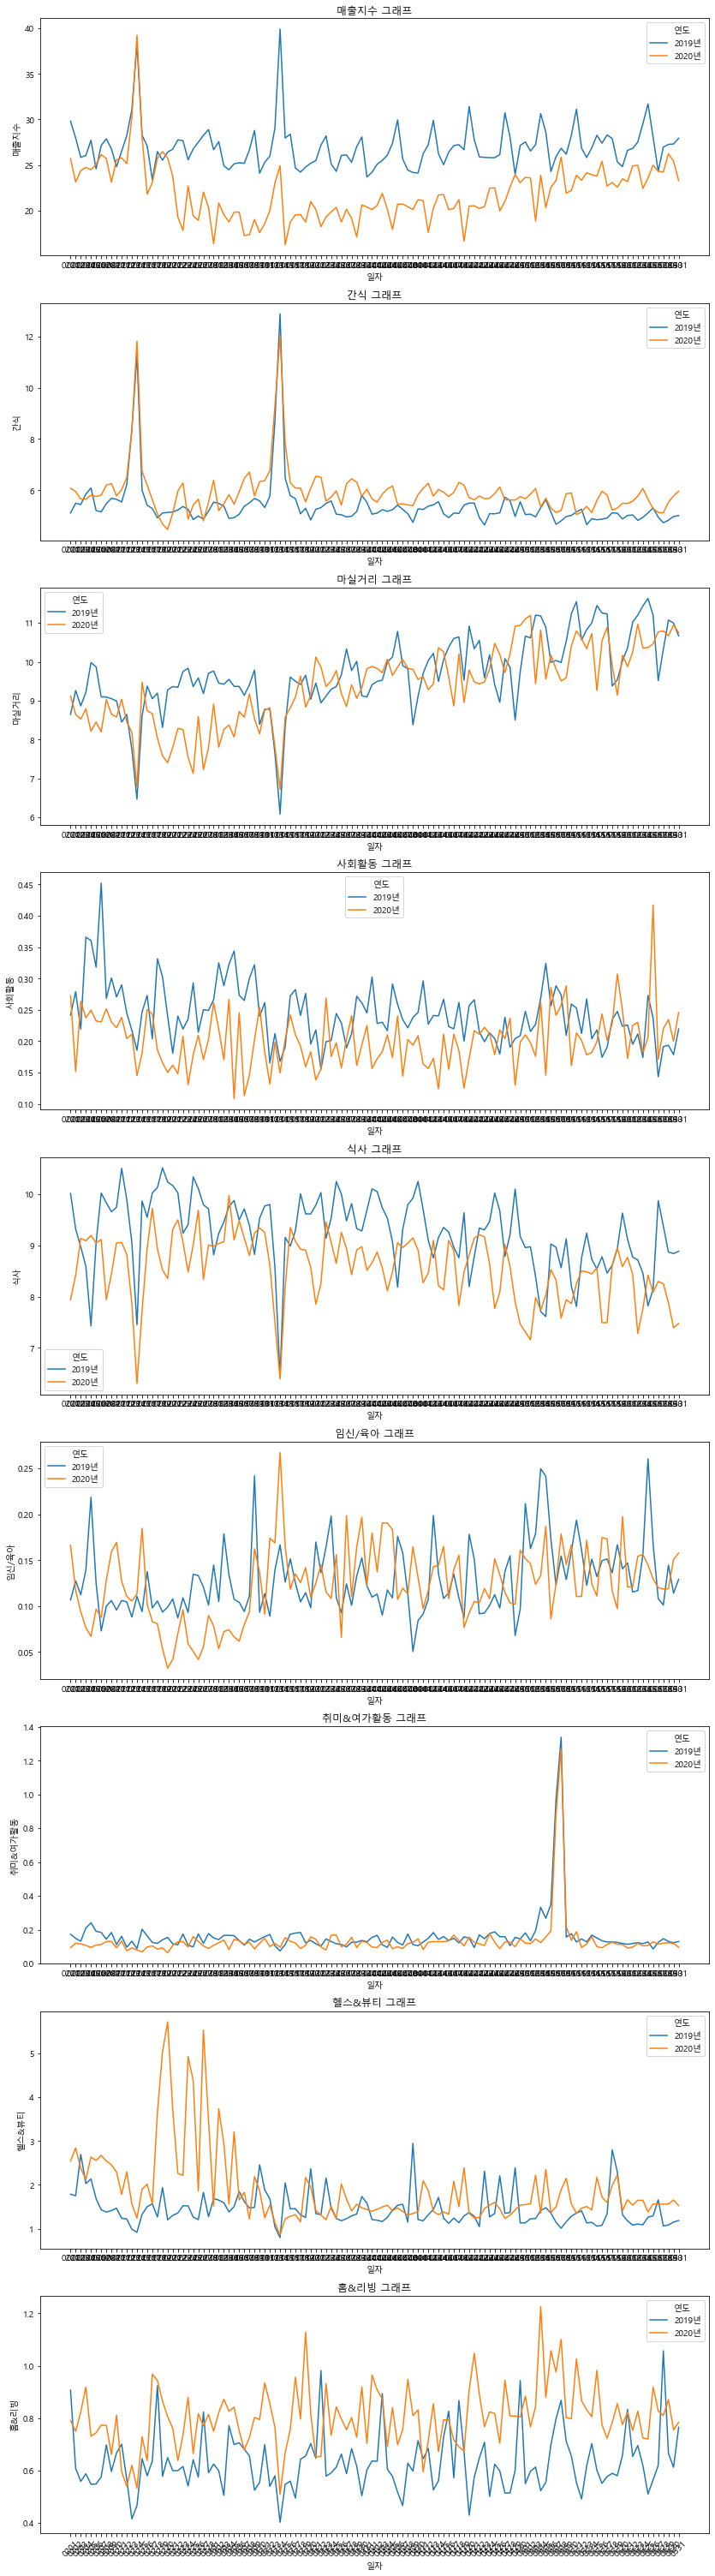

In [85]:
fig, axes = plt.subplots(nrows = 9)
fig.set_size_inches(14, 54)
move_list = ['매출지수', '간식', '마실거리', '사회활동', '식사',
              '임신/육아', '취미&여가활동', '헬스&뷰티', '홈&리빙']

for i in range(9) :
    plt.xticks(rotation = 45)
    sns.lineplot(x = move_dagu_day['날짜'], y = move_dagu_day[move_list[i]],
                 hue = move_dagu_day['연도'], data = move_dagu_day, ax = axes[i])
    axes[i].set(xlabel = '일자', ylabel = '{}'.format(move_list[i]), title = '{} 그래프'.format(move_list[i]))

#### 서울 19, 20년도 유통 차이 그래프

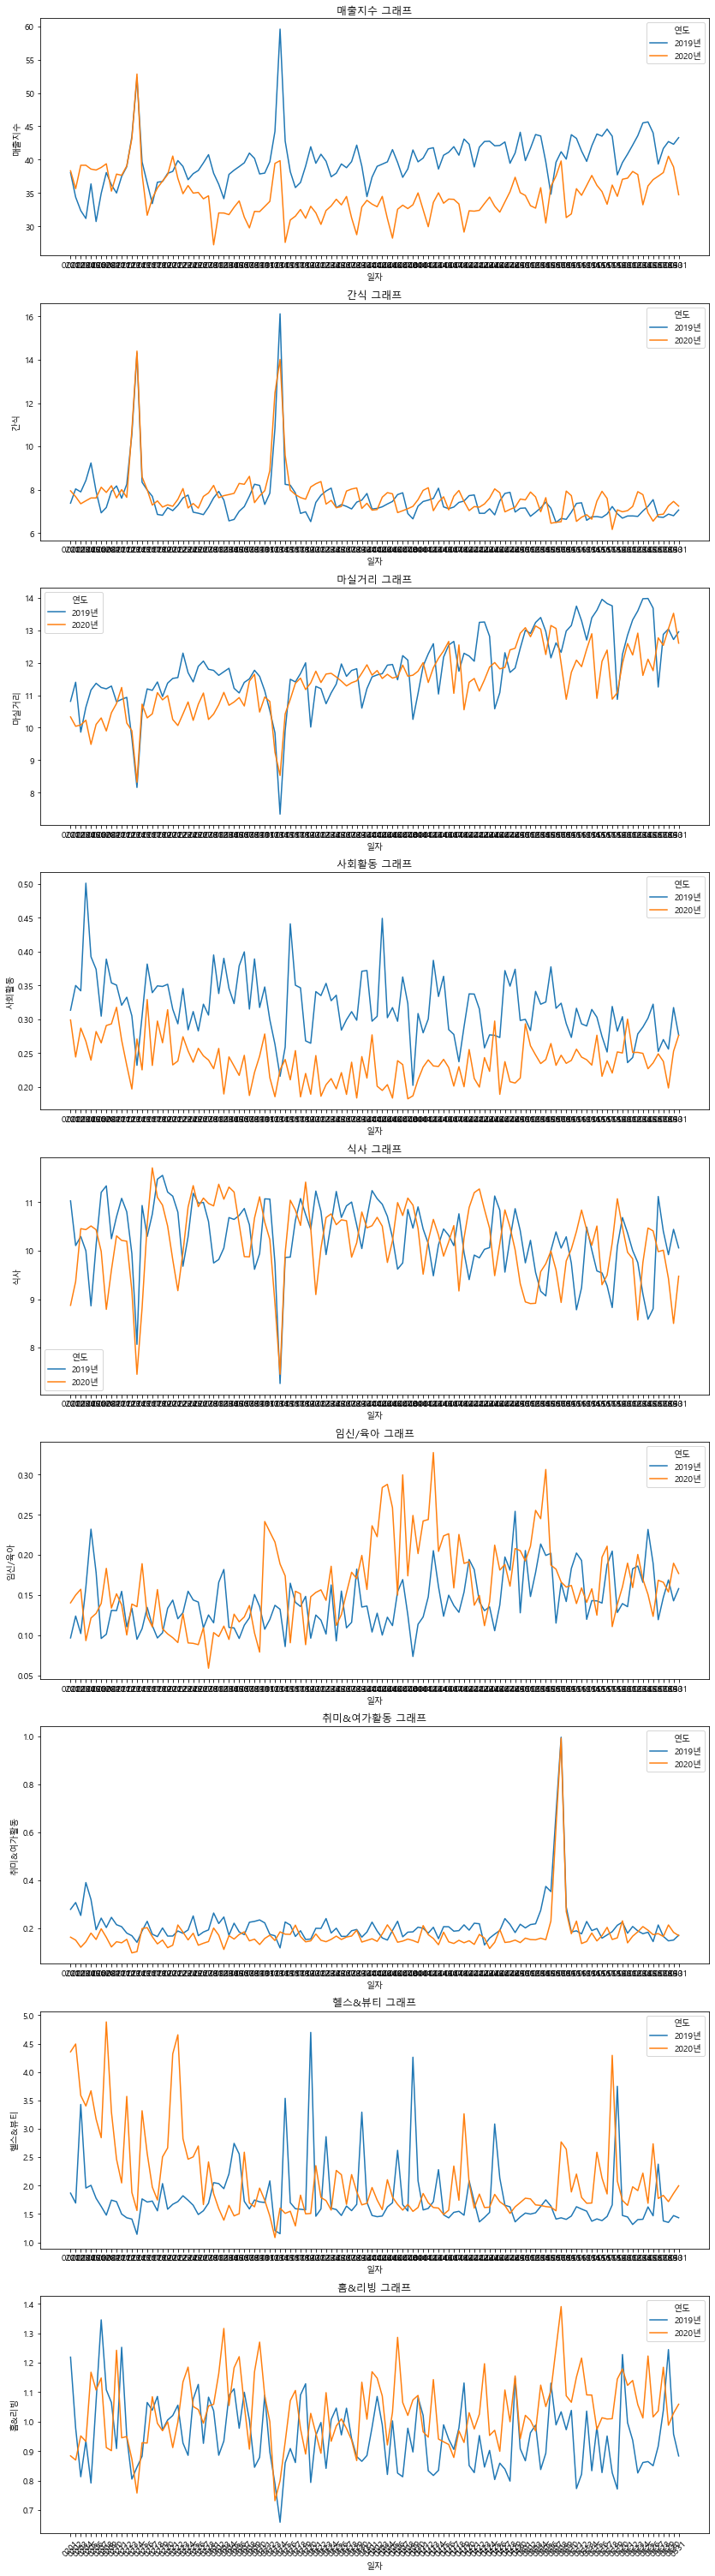

In [86]:
fig, axes = plt.subplots(nrows = 9)
fig.set_size_inches(14, 54)
move_list = ['매출지수', '간식', '마실거리', '사회활동', '식사',
              '임신/육아', '취미&여가활동', '헬스&뷰티', '홈&리빙']

for i in range(9) :
    plt.xticks(rotation = 45)
    sns.lineplot(x = move_seoul_day['날짜'], y = move_seoul_day[move_list[i]],
                 hue = move_seoul_day['연도'], data = move_seoul_day, ax = axes[i])
    axes[i].set(xlabel = '일자', ylabel = '{}'.format(move_list[i]), title = '{} 그래프'.format(move_list[i]))

### 2020년 서울, 대구 코로나 위험 수준에 따른 유통 비교

In [87]:
covid_seoul = pd.read_excel('../data/서울임시.xlsx')
covid_dagu = pd.read_excel('../data/대구임시.xlsx')

In [113]:
move_dagu_day_20['위험정도'] = covid_dagu['위험정도']

In [115]:
move_dagu_day_20 = move_dagu_day_20[['날짜', '위험정도', '매출지수', '간식', '마실거리', '사회활동', '식사',
              '임신/육아', '취미&여가활동', '헬스&뷰티', '홈&리빙']]

In [117]:
move_dagu_day_20 = pd.pivot_table(move_dagu_day_20, index = ['위험정도', '날짜'])

In [118]:
min_max_scaler = MinMaxScaler()
scaler_move_dagu_20 = min_max_scaler.fit_transform(move_dagu_day_20)

In [119]:
scaler_dagu = pd.DataFrame(scaler_move_dagu_20, columns = move_dagu_day_20.columns,
                          index = move_dagu_day_20.index)
scaler_dagu

간식      마실거리      매출지수      사회활동        식사     임신/육아  \
위험정도 날짜                                                                 
경계   0409  0.123387  0.690173  0.168369  0.276552  0.774393  0.563033   
     0416  0.170854  0.647572  0.168120  0.152098  0.761238  0.322046   
     0423  0.159218  0.618089  0.182588  0.368180  0.779735  0.369551   
     0503  0.211960  0.607543  0.113262  0.218930  0.457368  0.388680   
심각   0220  0.000000  0.154172  0.415184  0.136283  0.557985  0.000000   
...             ...       ...       ...       ...       ...       ...   
주의   0527  0.088024  0.905607  0.351135  0.203854  0.542819  0.373794   
     0528  0.086045  0.910839  0.347598  0.361776  0.531141  0.367071   
     0529  0.141211  0.882670  0.434877  0.408756  0.429909  0.368131   
     0530  0.173508  0.944940  0.399039  0.296598  0.296358  0.504440   
     0531  0.198067  0.900664  0.306736  0.444699  0.319190  0.534034   

            취미&여가활동     헬스&뷰티      홈&리빙  
위험정도 날짜                                  
경계   0409  0.051563  0.099727  0.419709  
     0416  0.059169  0.096526  0.396129  
     0423  0.035701  0.122907  0.360028  
     0503  0.068521  0.279509  0.467436  
심각   0220  0.000000  1.000000  0.414239  
...             ...       ...       ...  
주의   0527  0.042610  0.143485  0.445093  
     0528  0.047194  0.143433  0.419820  
     0529  0.050026  0.144096  0.505155  
     0530  0.046216  0.163099  0.343192  
     0531  0.027428  0.136294  0.384084  

[121 rows x 9 columns]

In [120]:
scaler_dagu.reset_index(inplace = True)
scaler_dagu = pd.pivot_table(scaler_dagu, index =['위험정도'], aggfunc = 'mean').T
dagu = scaler_dagu[['주의', '경계', '위험', '심각']]
dagu

위험정도,주의,경계,위험,심각
간식,0.183535,0.166355,0.148370,0.221545
마실거리,0.673106,0.640844,0.616220,0.446636
매출지수,0.318567,0.158085,0.220553,0.153385
사회활동,0.342539,0.253940,0.238970,0.254682
식사,0.550068,0.693184,0.652473,0.689104
임신/육아,0.411599,0.410828,0.387930,0.344934
취미&여가활동,0.071589,0.053738,0.029911,0.046489
헬스&뷰티,0.189803,0.149667,0.240577,0.253850
홈&리빙,0.422342,0.410826,0.401307,0.393601


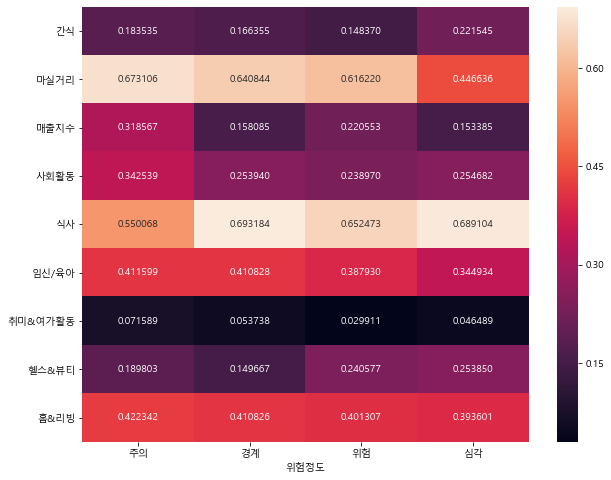

In [121]:
plt.figure(figsize = (10, 8))
sns.heatmap(dagu, annot = True, fmt = 'f')
plt.show()